In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from arch import arch_model

In [2]:
df = pd.read_csv('data-kiem-tra-1.csv')
df.head()

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,02.01.2013,0,59,22154,999.00,1
1,03.01.2013,0,25,2552,899.00,1
2,05.01.2013,0,25,2552,899.00,-1
3,06.01.2013,0,25,2554,1709.05,1
4,15.01.2013,0,25,2555,1099.00,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481822 entries, 0 to 481821
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      481822 non-null  object 
 1   truong_1  481822 non-null  int64  
 2   truong_2  481822 non-null  int64  
 3   truong_3  481822 non-null  int64  
 4   truong_4  481822 non-null  float64
 5   truong_5  481822 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 22.1+ MB


In [8]:
df['date'] = pd.to_datetime(df['date'], format = "%d.%m.%Y")
df = df.sort_values(by = 'date')
df.head()

,date,truong_1,truong_2,truong_3,truong_4,truong_5
85124,2013-01-01,0,54,11562,299.0,1
58034,2013-01-01,0,14,14014,299.0,1
29617,2013-01-01,0,27,5636,2390.0,1
87873,2013-01-01,0,54,9301,1389.0,1
108918,2013-01-01,0,46,16497,149.0,1


In [26]:
returns = df['truong_3']
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit()

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.947e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 6635780.449850403
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4895106.47485783
Iteration:      3,   Func. Count:     18,   Neg. LLF: 4919260.92477764
Iteration:      4,   Func. Count:     25,   Neg. LLF: 4906135.820447984
Iteration:      5,   Func. Count:     32,   Neg. LLF: 4895086.206107392
Iteration:      6,   Func. Count:     37,   Neg. LLF: 4895098.487474688
Iteration:      7,   Func. Count:     43,   Neg. LLF: 4895087.002562696
Iteration:      8,   Func. Count:     49,   Neg. LLF: 4895083.697000177
Iteration:      9,   Func. Count:     54,   Neg. LLF: 4895083.65703072
Iteration:     10,   Func. Count:     59,   Neg. LLF: 4895083.656879569
Iteration:     11,   Func. Count:     64,   Neg. LLF: 4895094.01194496
Iteration:     12,   Func. Count:     73,   Neg. LLF: 4895083.656852481
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4895083.656848747
            Iterations: 12
     

In [27]:
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               truong_3   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:           -4.89508e+06
Distribution:                  Normal   AIC:                       9.79018e+06
Method:            Maximum Likelihood   BIC:                       9.79022e+06
                                        No. Observations:               481822
Date:                Tue, Jun 04 2024   Df Residuals:                   481821
Time:                        09:19:42   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0083e+04      9.341   1079.471      0.000 [1.

In [28]:
forecast_horizon = 10  
forecast = model_fit.forecast(horizon=forecast_horizon)

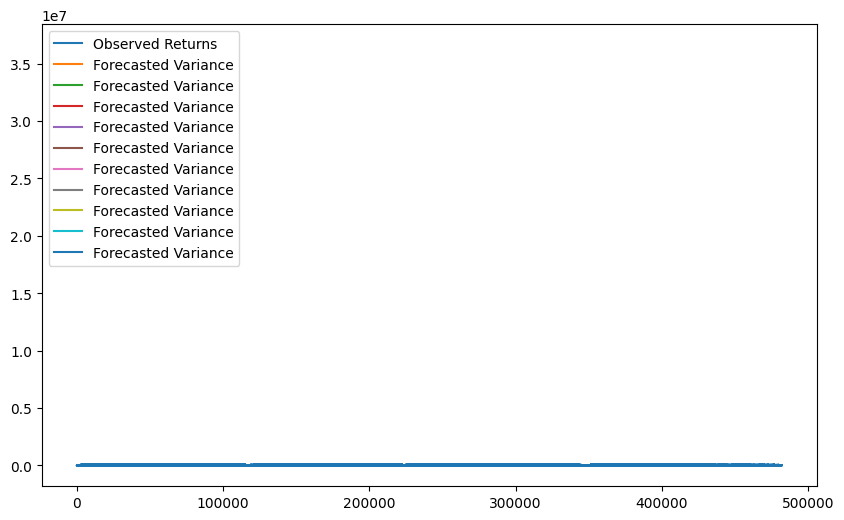

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Observed Returns')
plt.plot(forecast.variance[-forecast_horizon:], label='Forecasted Variance')
plt.legend()
plt.show()